In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [61]:
data = pd.read_csv("housing.csv")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

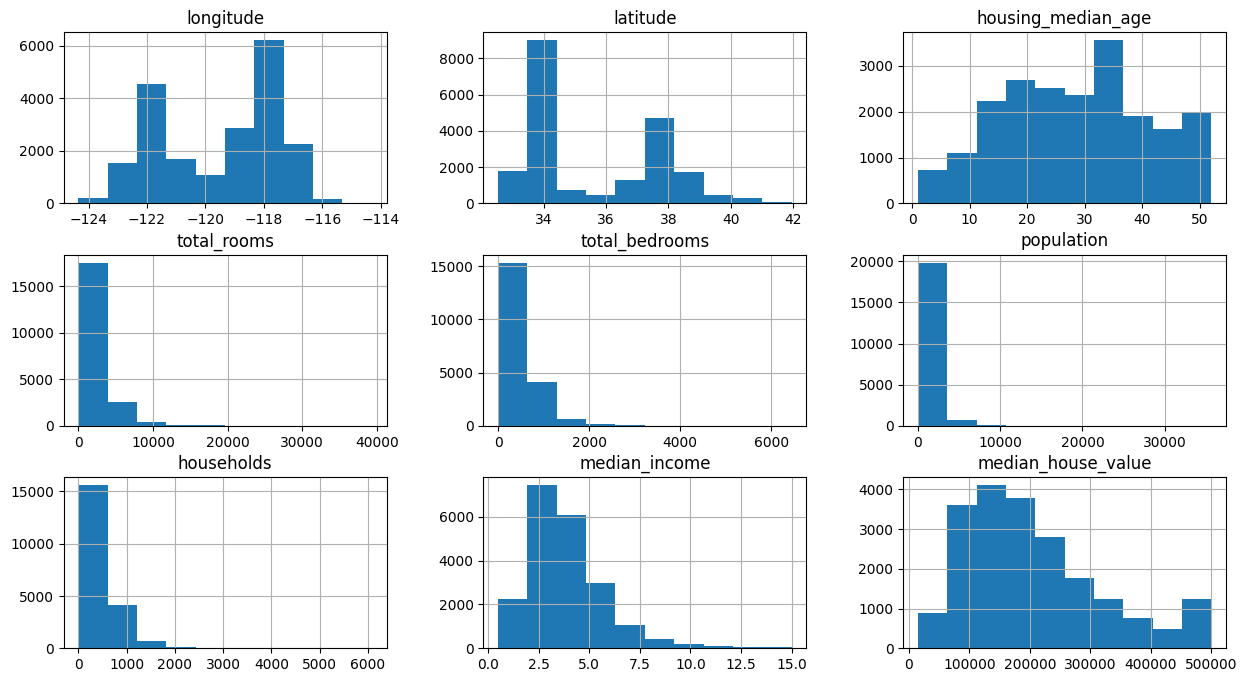

In [62]:
data.hist(figsize=(15,8))

In [63]:
data.dropna(inplace =True)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [65]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [67]:
train_data = x_train.join(y_train)

In [68]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10830,-117.94,33.66,16.0,2095.0,450.0,963.0,411.0,5.5000,<1H OCEAN,224100.0
2189,-120.08,36.72,22.0,1339.0,251.0,820.0,276.0,3.6000,INLAND,83200.0
409,-122.28,37.90,52.0,2003.0,250.0,658.0,244.0,10.0825,NEAR BAY,397000.0
15318,-117.36,33.20,26.0,2447.0,482.0,1405.0,486.0,3.2917,NEAR OCEAN,150800.0
14253,-117.10,32.71,29.0,3422.0,713.0,2775.0,644.0,1.7075,NEAR OCEAN,86900.0
...,...,...,...,...,...,...,...,...,...,...
2337,-119.67,36.83,4.0,2145.0,334.0,1024.0,308.0,5.0864,INLAND,113700.0
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,<1H OCEAN,205300.0
4367,-118.27,34.10,41.0,3729.0,740.0,1364.0,707.0,5.7778,<1H OCEAN,412700.0
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653,<1H OCEAN,236100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

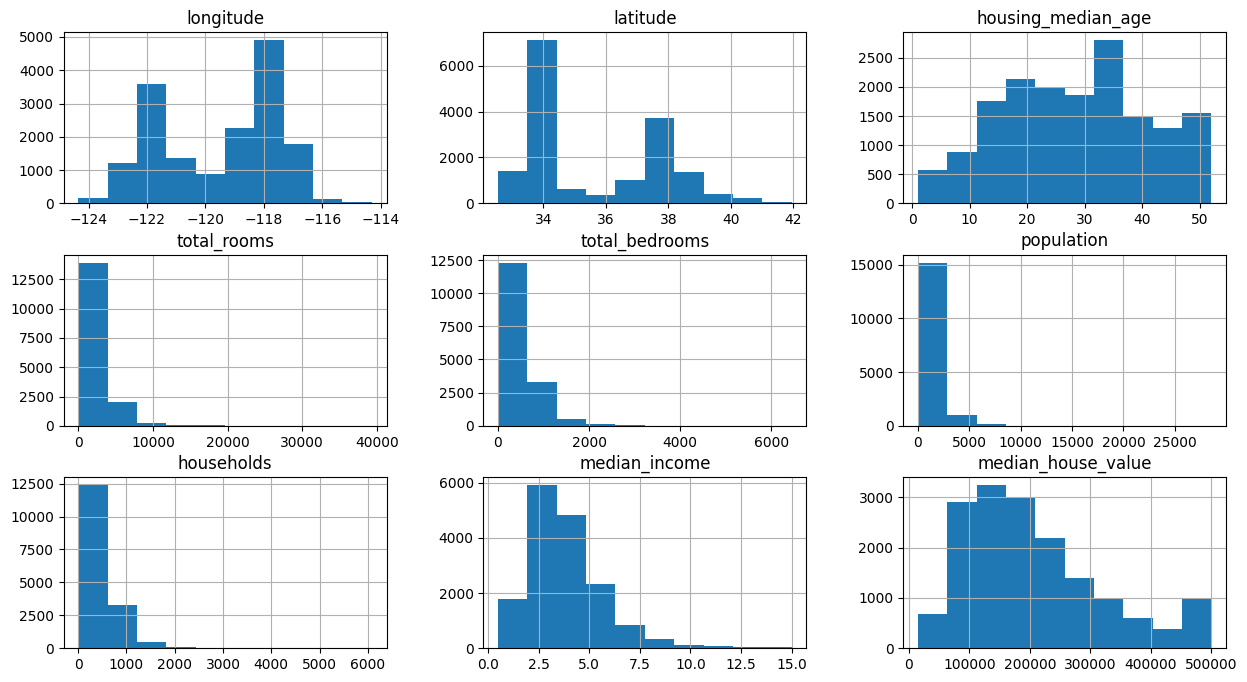

In [69]:
train_data.hist(figsize=(15,8))

In [70]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

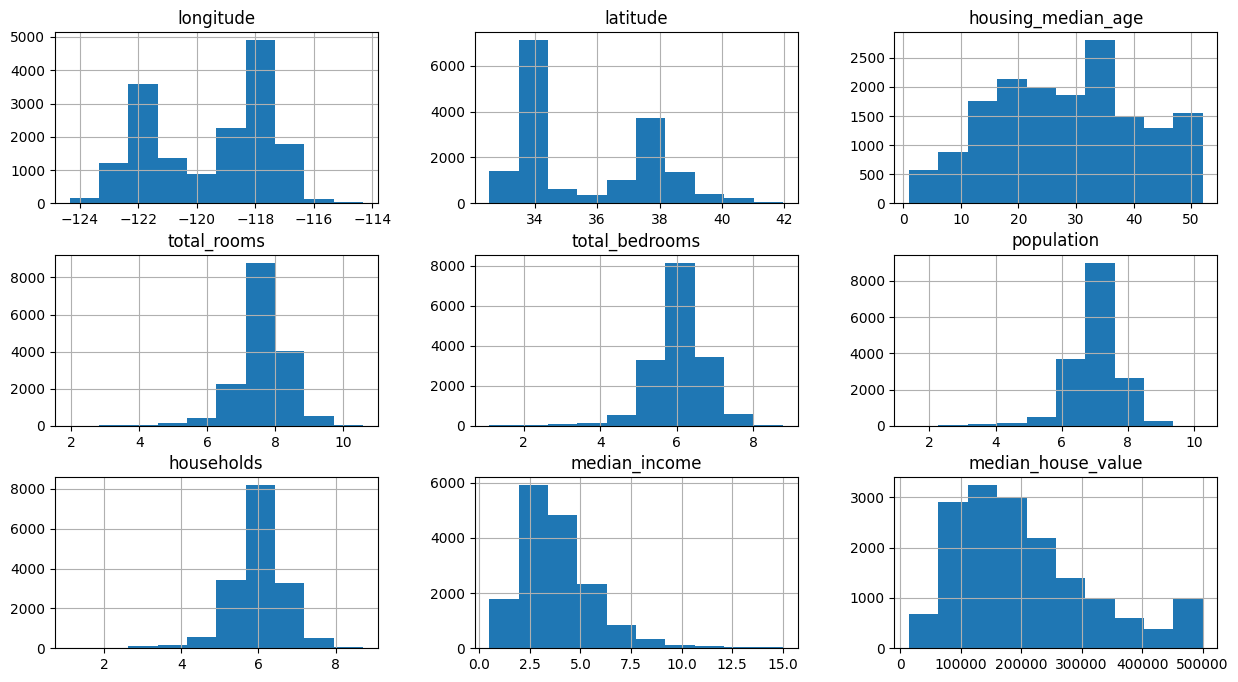

In [71]:
train_data.hist(figsize=(15,8))

In [72]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

In [73]:
data_relation = train_data.corr()
data_relation["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.684233
<1H OCEAN             0.258798
NEAR BAY              0.161314
total_rooms           0.158037
NEAR OCEAN            0.141332
housing_median_age    0.105460
households            0.072449
total_bedrooms        0.053657
ISLAND                0.026342
population           -0.022759
longitude            -0.049431
latitude             -0.141822
INLAND               -0.486434
Name: median_house_value, dtype: float64

<Axes: xlabel='latitude', ylabel='longitude'>

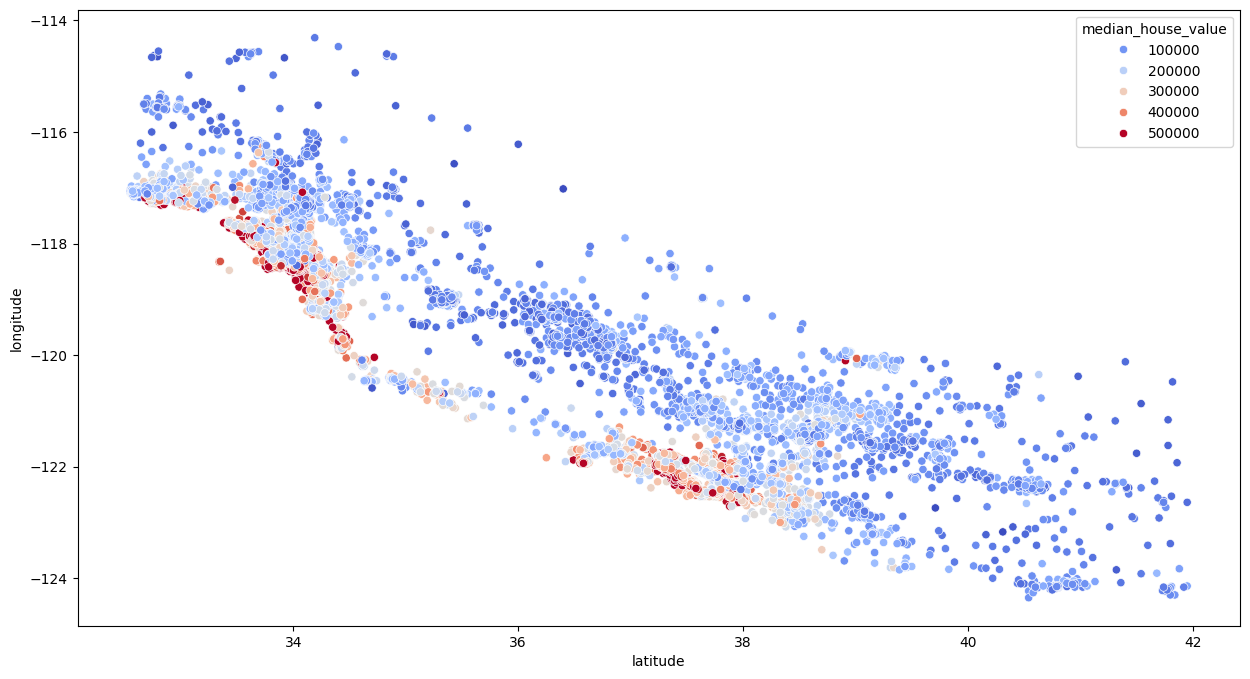

In [74]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette="coolwarm")

In [75]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_bedrooms']/ train_data['households']

In [76]:
from sklearn.linear_model import LinearRegression
x_train,y_train = train_data.drop(['median_house_value'],axis = 1),train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [77]:
test_data = x_test.join(y_test)


In [78]:

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_bedrooms']/ test_data['households']

In [79]:
x_test,y_test = test_data.drop(['median_house_value'],axis = 1),test_data['median_house_value']

In [80]:
reg.score(x_test,y_test)

0.6817198707022651

In [81]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
print(rfr.score(x_test,y_test))

0.818320110350641


In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
gscv = GridSearchCV(rfr,param_grid,cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [119]:
gscv.cv_results_

{'mean_fit_time': array([0.07606235, 0.23169785, 0.69387779, 0.11632276, 0.37678175,
        1.13704295, 0.16294827, 0.52667389, 1.58247042, 0.20380039,
        0.68521676, 2.06026106, 0.10482049, 0.34955049, 0.13513627,
        0.45132508, 0.17086129, 0.5516788 ]),
 'std_fit_time': array([0.00566079, 0.00697894, 0.00823599, 0.00276299, 0.00358393,
        0.00684562, 0.00299928, 0.0028006 , 0.01150356, 0.00373339,
        0.00628737, 0.00580641, 0.00376078, 0.01106844, 0.00492123,
        0.00432886, 0.00621166, 0.00293846]),
 'mean_score_time': array([0.00472193, 0.00818658, 0.02088957, 0.00364304, 0.00918579,
        0.02047172, 0.00411754, 0.00939641, 0.02196112, 0.00251689,
        0.00961504, 0.02434134, 0.00340705, 0.01002941, 0.00297012,
        0.00955524, 0.0056149 , 0.01143913]),
 'std_score_time': array([0.00378745, 0.00294616, 0.00082486, 0.00304746, 0.00169844,
        0.00097432, 0.00344328, 0.00200034, 0.0016781 , 0.0027943 ,
        0.00171661, 0.00327014, 0.00307836, 